<a href="https://colab.research.google.com/github/KBRAMonkda27/InteligenciaArtificial_N4_FIME/blob/main/AF5_Procesamiento_de_conjunto_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD 5:
#Procesamiento de conjunto de datos en Python
###Equipo numero 5
###N4 Carlos Adrian Moncada Chaires Matricula: 2173870
###N4
#
#
#Ejercicio 1.- Análisis y normalización de datos de sensores en un robot móvil


# **Carga de Datos**

In [67]:
#Utilizamos este codigo para poder subir nuestra tabla de excel con los datos de los sensores del robot
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')
# Despues de subir los archivos importaremos las librerias necesareias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
ruta="/content/drive/MyDrive/af5/robot_sensors.csv"
#Creamos una data frame
df = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Mostrar primeras 10 filas**

In [68]:
# Muestra las primeras 40 líneas de datos.
print(df.head(40))

    Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0            0       43.708611          9.256646         23.925585
1            1       95.564288         27.095047         23.704682
2            2       75.879455         43.647292         33.593819
3            3       63.879264         36.611244         23.743193
4            4       24.041678         40.328057         24.079246
5            5       24.039507         32.939168         31.390974
6            6       15.227525         34.613828         26.746098
7            7       87.955853         42.459783         31.650658
8            8       64.100351         12.483400         20.980492
9            9       73.726532         24.471248         27.313568
10          10       11.852604         11.060472         20.504204
11          11       97.291887         49.383400         20.939798
12          12       84.919838         47.202967         33.596562
13          13       29.110520          1.971341         22.08

# **Obtén información sobre las columnas y el tipo de datos de cada una**

In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        1000 non-null   int64  
 1   Distancia (cm)    970 non-null    float64
 2   Velocidad (cm/s)  970 non-null    float64
 3   Temperatura (°C)  970 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None


# **VERIFICAMOS SI HAY VALORES NULOS**

In [70]:
print(df.isnull().sum())

Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64


# **LIMPIAMOS VALORES NULOS**

In [71]:
#ELIMINAMOS FILAS CON VALORES NULOS
df = df.dropna(subset=['Distancia (cm)', 'Velocidad (cm/s)','Temperatura (°C)'])

#**Normalizar los datos numéricos con Min-Max Scaling**

In [72]:
#Seleccionar columnas numéricas a normalizar
columnas_num = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

In [73]:
scaler = MinMaxScaler()
df[columnas_num] = scaler.fit_transform(df[columnas_num])

In [74]:
print(df.head(40))

    Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0            0        0.371735          0.182609          0.262269
1            1        0.950755          0.540740          0.247509
2            2        0.730954          0.873049          0.908233
3            3        0.596960          0.731791          0.250082
4            4        0.152134          0.806411          0.272535
5            5        0.152110          0.658069          0.761054
6            6        0.053716          0.691690          0.450716
7            7        0.865799          0.849208          0.778404
8            8        0.599429          0.247391          0.065498
9            9        0.706915          0.488064          0.488630
10          10        0.016031          0.218824          0.033676
11          11        0.970045          0.988209          0.062779
12          12        0.831899          0.944434          0.908416
13          13        0.208733          0.036347          0.13

# **VISUALIZAR VALORES NORMALIZADOS CONTRA COLUMNA DEE TIEMPO**

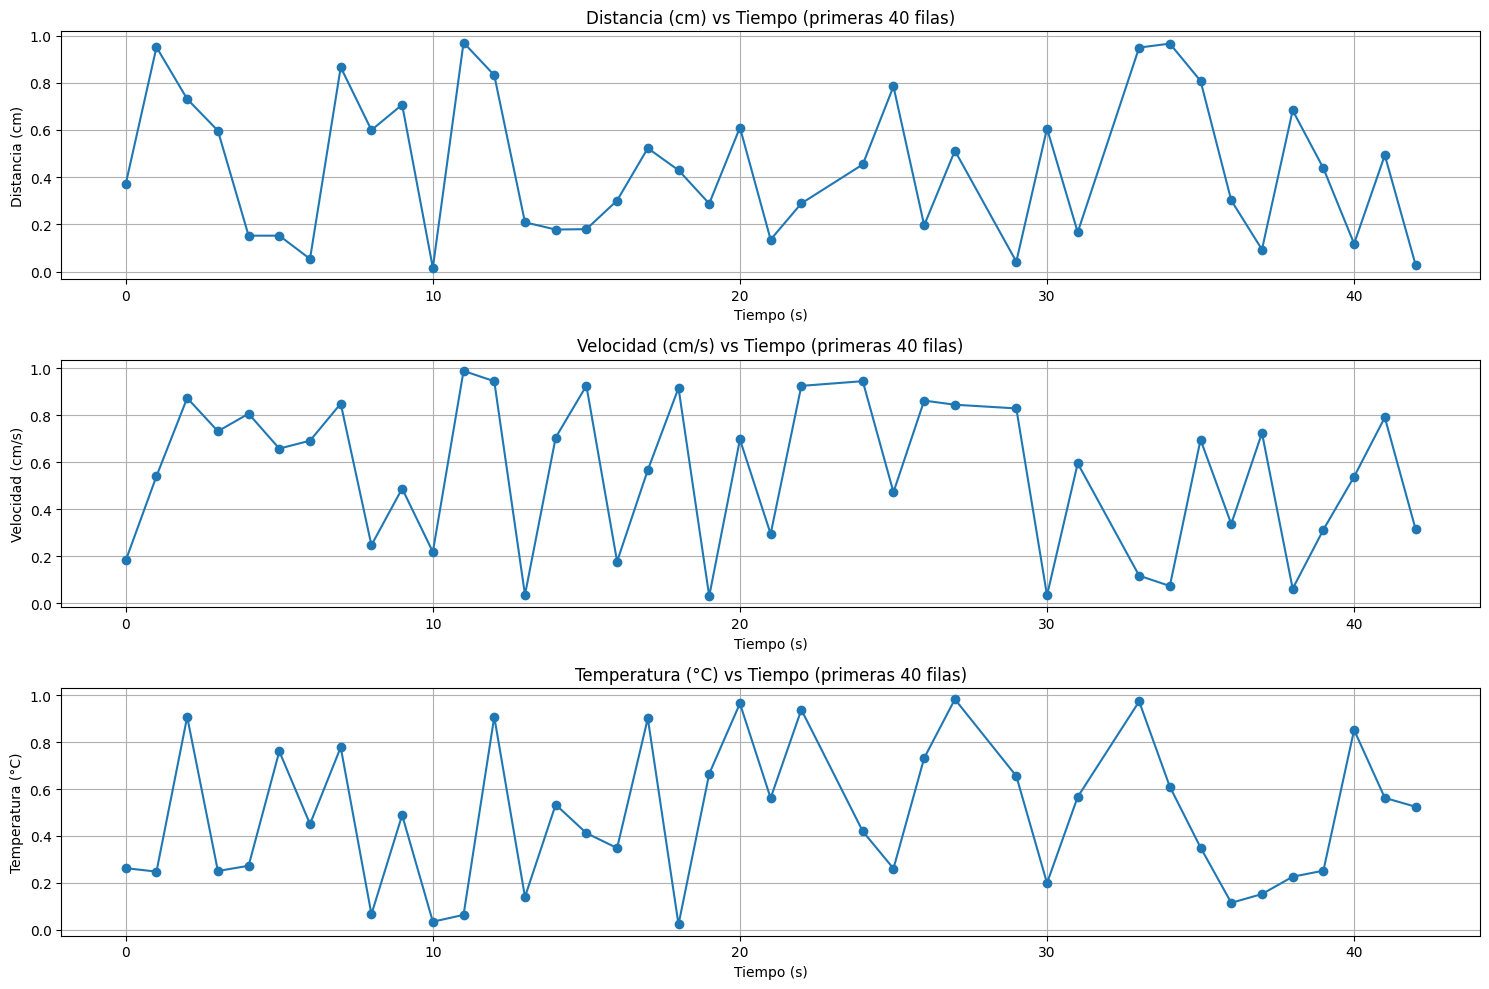

In [75]:
# Número de filas a graficar
n_filas = 40
df_plot = df.head(n_filas)

# Columnas a graficar
columnas_sensores = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

# Configurar figura
plt.figure(figsize=(15, 10))

# Graficar cada sensor en un subplot
for i, col in enumerate(columnas_sensores, 1):
    plt.subplot(3, 1, i)  # 3 filas, 1 columna, posición i
    plt.plot(df_plot['Tiempo (s)'], df_plot[col], marker='o', linestyle='-')
    plt.title(f'{col} vs Tiempo (primeras {n_filas} filas)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()